In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from sklearn.decomposition import PCA
from numpy.linalg import norm


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Q3
## Eigenface and simple face recognition



This question is a simplified illustration of using PCA for face recognition. We will use a
subset of data from the famous Yale Face dataset. Remark: You will have to perform
downsampling of the image by a factor of 4 to turn them into a lower resolution image as
a preprocessing (e.g., reduce a picture of size 16-by-16 to 4-by-4). In this question, you can
implement your own code or call packages.
First, given a set of images for each person, we generate the eigenface using these images.
You will treat one picture from the same person as one data point for that person. Note that
you will first vectorize each image, which was originally a matrix. Thus, the data matrix
(for each person) is a matrix; each row is a vectorized picture. You will find weight vectors
to combine the pictures to extract different “eigenfaces” that correspond to that person’s
pictures’ first few principal components.

1. (10 points) Perform analysis on the Yale face dataset for Subject 1 and Subject 2, re-spectively, using all the images EXCEPT for the two pictures named subject01-test.gifand subject02-test.gif. Plot the first 6 eigenfaces for each subject. When visual-izing, please reshape the eigenvectors into proper images. Please explain can you seeany patterns in the top 6 eigenfaces?

In [2]:
#don't read the test images
ignore = ['subject01-test.gif', 'subject02-test.gif']

In [3]:
#subject two images only
subject_2 = [plt.imread(os.path.join('yalefaces',x)).astype('float') for x in os.listdir('yalefaces') if x not in ignore and 'subject02' in x]

#subject one images only
subject_1 = [plt.imread(os.path.join('yalefaces',x)).astype('float') for x in os.listdir('yalefaces') if x not in ignore and 'subject01' in x]

In [4]:
#get shape of a single image
m,n = subject_2[0].shape

#reshape by a factor of 4
m = m//4
n = n//4

#reshape images
images_resized_1 = [cv2.resize(x, (n,m)) for x in subject_1]
images_resized_2 = [cv2.resize(x, (n,m)) for x in subject_2]

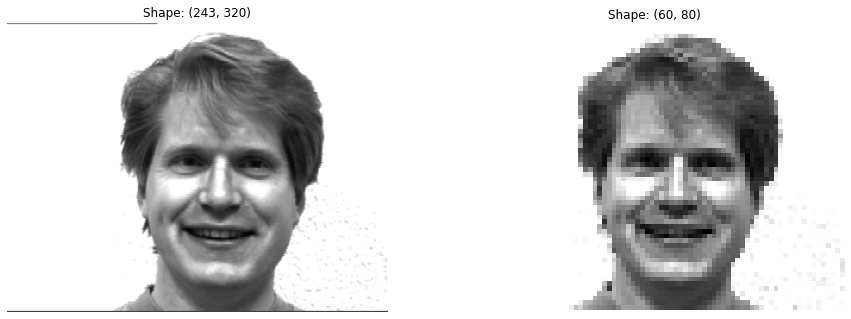

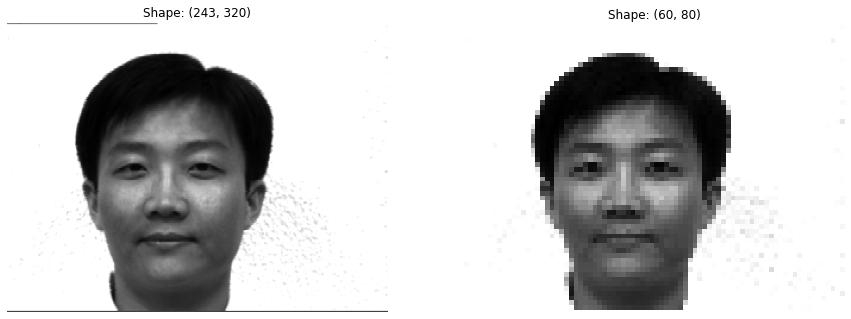

In [5]:

plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.subplot(121)
plt.imshow(subject_1[0], cmap='gray')
plt.title('Shape: {}'.format(subject_1[0].shape))
plt.axis('off')
plt.subplot(122)
plt.imshow(images_resized_1[0], cmap='gray')
plt.title('Shape: {}'.format(images_resized_1[0].shape))
plt.axis('off')
plt.show()

plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.subplot(121)
plt.imshow(subject_2[0], cmap='gray')
plt.title('Shape: {}'.format(subject_2[0].shape))
plt.axis('off')
plt.subplot(122)
plt.imshow(images_resized_2[0], cmap='gray')
plt.title('Shape: {}'.format(images_resized_2[0].shape))
plt.axis('off')
plt.show()

In [6]:
#vectorize subject 1
images_resized_1 = np.array([x.ravel() for x in images_resized_1])

#vectorize subject 2
images_resized_2 = np.array([x.ravel() for x in images_resized_2])


print('Subject 1 Vector shape: ', images_resized_1.shape)
print('Subject 2 Vector shape: ', images_resized_2.shape)

Subject 1 Vector shape:  (10, 4800)
Subject 2 Vector shape:  (9, 4800)


In [7]:
#perform PCA on resized images
pca_1 = PCA(n_components=6)
pca_2 = PCA(n_components=6)

pca_1.fit(images_resized_1)
pca_2.fit(images_resized_2)

PCA(n_components=6)

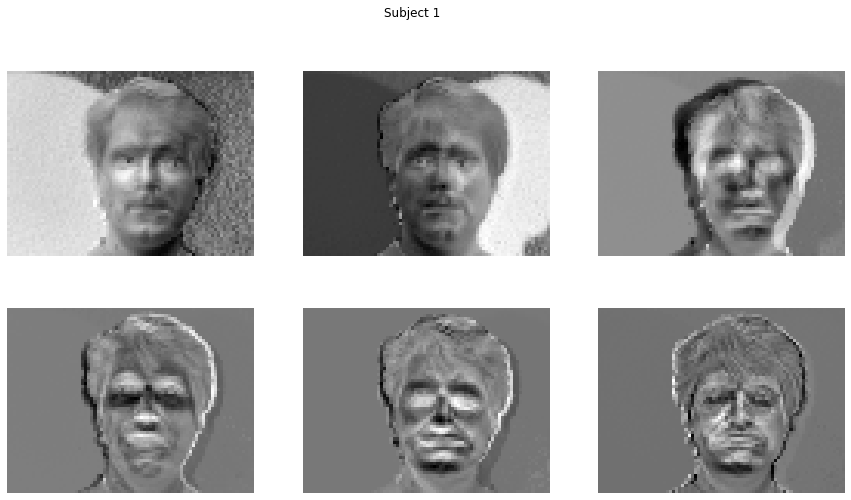

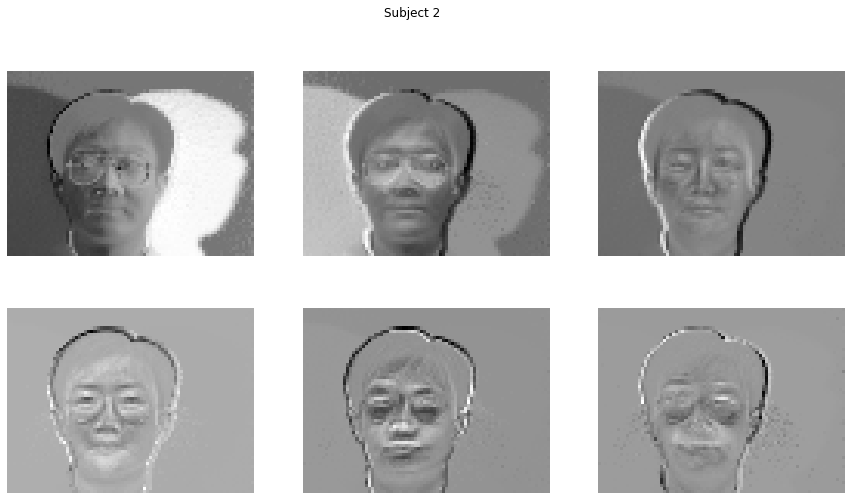

In [8]:
shape = (60,80)

plt.subplots(nrows=2, ncols=3, figsize=(15,8))
for pos,i in enumerate(pca_1.components_):
    i = i*-1
    plt.subplot(2,3,pos+1)
    plt.imshow(i.reshape(shape), cmap='gray', vmin=min(i), vmax=max(i))
    plt.axis('off')
plt.suptitle('Subject 1')
    
plt.show()
print()
print()
plt.subplots(nrows=2, ncols=3, figsize=(15,8))
for pos,i in enumerate(pca_2.components_):
    i = i*-1
    plt.subplot(2,3,pos+1)
    plt.imshow(i.reshape(shape), cmap='gray')
    plt.axis('off')
plt.suptitle('Subject 2')
plt.show()

### Analysis

If we pair the eigenfaces by 2, it appears they are the negative of each other. For example, for Subject 1, if we look at the first and second eigenface, where the background is light on the left and dark on the right for the first eigenface, it is the exact opposite for the second eigenface. The background is dark on the left and light on the right. We can see this trend in pairs of two for all images. Looking at subject two for the 5th and 6th eigenface, If we compare the outlines of the entire head, for both images, where there is a dark outline on one image, it is light on the other image and vice versa


2. Now we will perform a simple face recognition task. Face recognition through PCA is proceeded as follows. Given the test image subject01- test.gif and subject02-test.gif, first downsize by a factor of 4 (as before), and vectorize each image. Take the top eigenfaces of Subject 1 and Subject 2, respectively. Then we calculate the normalized inner product score of the 2 vectorized test images with the vectorized eigenfaces: \begin{equation}s_ij = \frac{(eigenface)_i^T (test image)_j}{||(eigenface_i)||\ \  \cdot \ \  ||(test image)_j||}\end{equation} Report all four scores: $s_{ij}$ , i = 1, 2, j = 1, 2. Explain how to recognize the faces of the test images using these scores. Explain if face recognition can work well and discuss how we can improve it, possibly.

In [9]:
#load the test images and resize by a factor of 4
test_1 = cv2.resize(plt.imread(os.path.join('yalefaces','subject01-test.gif')), (n,m))
test_2 = cv2.resize(plt.imread(os.path.join('yalefaces','subject02-test.gif')), (n,m))

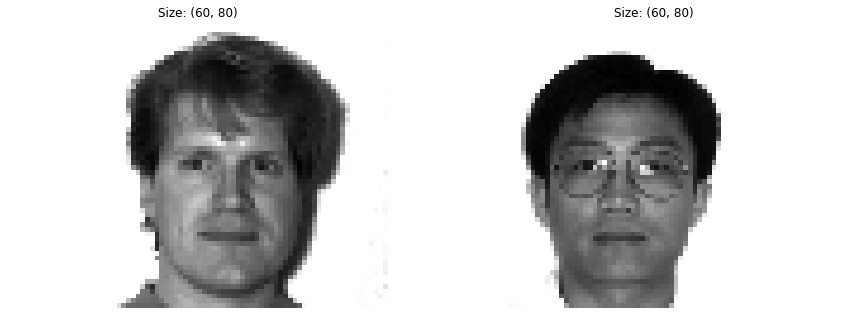

In [10]:
plt.subplots(nrows=1,ncols=2,figsize=(15,8))
plt.subplot(121)
plt.imshow(test_1, cmap='gray')
plt.axis('off')
plt.title('Size: {}'.format(test_1.shape))
plt.subplot(122)
plt.imshow(test_2, cmap='gray')
plt.axis('off')
plt.title('Size: {}'.format(test_2.shape))
plt.show()

In [11]:
#vectorize test images
test_1 = test_1.ravel()
test_2 = test_2.ravel()

In [12]:
# get the top eigenvectors for each subject
pca_1_top = pca_1.components_[0] * -1
pca_2_top = pca_2.components_[0] * -1

In [13]:
def sij(a, b):
    return(a @ b.T) / (norm(a)*norm(b))

In [14]:
print(
'''
Eigenface:        Subject 1
Test Image:       Subject 1 Test
Cos Similarity:   {}
Similarity Angle: {} degrees
'''.format(round(sij(pca_1_top, test_1), 3), round(np.degrees(np.arccos(sij(pca_1_top, test_1))),3))
)

print(
'''
Eigenface:        Subject 1
Test Image:       Subject 2 Test
Cos Similarity:   {}
Similarity Angle: {} degrees
'''.format(round(sij(pca_1_top, test_2), 3), round(np.degrees(np.arccos(sij(pca_1_top, test_2))),3))
)

print(
'''
Eigenface:        Subject 2
Test Image:       Subject 1 Test
Cos Similarity:   {}
Similarity Angle: {} degrees
'''.format(round(sij(pca_2_top, test_1), 3), round(np.degrees(np.arccos(sij(pca_2_top, test_1))),3))
)

print(
'''
Eigenface:        Subject 2
Test Image:       Subject 2 Test
Cos Similarity:   {}
Similarity Angle: {} degrees
'''.format(round(sij(pca_2_top, test_2), 3), round(np.degrees(np.arccos(sij(pca_2_top, test_2))),3))
)


Eigenface:        Subject 1
Test Image:       Subject 1 Test
Cos Similarity:   0.874
Similarity Angle: 29.117 degrees


Eigenface:        Subject 1
Test Image:       Subject 2 Test
Cos Similarity:   0.696
Similarity Angle: 45.878 degrees


Eigenface:        Subject 2
Test Image:       Subject 1 Test
Cos Similarity:   0.092
Similarity Angle: 84.697 degrees


Eigenface:        Subject 2
Test Image:       Subject 2 Test
Cos Similarity:   0.415
Similarity Angle: 65.477 degrees



### Analysis

When calculating the cosine similarity between the test image for subject 1 and the first PC from subject 1 PCA, we can see the angle between them is 29 degrees. This is in contrast to the first PC and test image for subject 2, which has an angle of 46 degrees. Since the angle between PC 1 and test subject 1 is lower, we can conclude that test subject 1 belongs with the subject 1 training data. This is a correct classification. 

Conversely, the correct classification is achieved for test subject 2. The angle between test subject 2 and the first PC from subject 2 PCA yields an anlge of 65 degrees whereas test subject 1 yielded an angle of 85 degrees. We can conclude between the two, test subject 2 correctly belongs with the subject 2 training data. However an angle of 65 degrees doesn't command much confidence in the classification. 

This could be improved with more training data as it seems there is bias in the fit of the data. Also, other classification models might produce better results than simply performing consine similarity